# Deep Learning | Sequence Models

### Dataset: IMDB| Framework: Keras (Tensorflow)

## 🔹 1. RNN for Sentiment Classification

### ✅ Download and Explore the dataset

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, Bidirectional, Attention, GlobalAveragePooling1D, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

2025-10-27 20:35:30.160391: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
vocab_size = 10000    # Only top 10,000 words
maxlen = 200          # each review of only 200 words

In [ ]:
# Load the dataset

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [ ]:
# print shapes
print(X_train.shape)
print(y_train.shape)

(25000,)
(25000,)


In [ ]:
# Check sample review
print("Sample review:", X_train[2])
print("\nLabel:", y_train[2])

Sample review: [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 2, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]

Label: 0


In [ ]:
# iterate over all the reviews and check the maximum value
print(max([max(review) for review in X_train]))

9999


In [ ]:
# Load the word index mapping (word → index)
word_index = imdb.get_word_index()

In [ ]:
word_index['amazing']

477

In [ ]:
print(list(word_index.items())[-10:])

[('copywrite', 88581), ('geysers', 52003), ('artbox', 88582), ('cronyn', 52004), ('hardboiled', 52005), ("voorhees'", 88583), ('35mm', 16815), ("'l'", 88584), ('paget', 18509), ('expands', 20597)]


In [ ]:
# Create a reverse mapping (index → word)
reverse_word_index = {index + 3: word for word, index in word_index.items()}
reverse_word_index[0] = '<PAD>'
reverse_word_index[1] = '<START>'
reverse_word_index[2] = '<UNK>'
reverse_word_index[3] = '<UNUSED>'

In [ ]:
reverse_word_index[477+3]

'amazing'

In [ ]:
# Decode function
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])

In [ ]:
# Show sample
print("Encoded Review:", X_train[2])
print("\nDecoded Review:", decode_review(X_train[2]))
print("\nLabel:", y_train[2])  # 0 = negative, 1 = positive

Encoded Review: [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 2, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]

Decoded Review: <START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally cryin

### ✅ Pad Sequences

In [ ]:
len(X_train[168])

200

In [ ]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
print("Decoded Review:", decode_review(X_train[2]))

Decoded Review: <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had <UNK> working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get acro

In [ ]:
def plot_training_curves(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy plot
    axs[0].plot(history.history['accuracy'], label='Train Acc')
    axs[0].plot(history.history['val_accuracy'], label='Val Acc')
    axs[0].set_title('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Loss plot
    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Val Loss')
    axs[1].set_title('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.tight_layout()
    plt.show()


In [ ]:
model_rnn = Sequential([
    Input(shape=(maxlen,)),
    Embedding(input_dim=vocab_size, output_dim=128),
    SimpleRNN(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_rnn.summary()

I0000 00:00:1761580746.695327    2624 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7535 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,292,417 (4.93 MB)

 Trainable params: 1,292,417 (4.93 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### ✅ Train the Model

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)

In [ ]:
# Dictionary to store model accuracies
model_accuracies = {}

In [ ]:
history_rnn = model_rnn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    callbacks=[early_stop]
)

Epoch 1/10


2025-10-27 21:03:23.623708: I external/local_xla/xla/service/service.cc:163] XLA service 0x7c3d1c005c80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-27 21:03:23.623742: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-10-27 21:03:23.677727: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-27 21:03:23.880737: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91301
2025-10-27 21:03:23.978332: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-27 21:03:23.978392: I e

  5/157 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.4836 - loss: 0.7082

I0000 00:00:1761581007.374683    3020 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6086 - loss: 0.6401

2025-10-27 21:03:33.163937: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-27 21:03:33.164009: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-27 21:03:33.164033: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-27 21:03:34.004789: I external/l

157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.7026 - loss: 0.5538 - val_accuracy: 0.8282 - val_loss: 0.3918
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.8684 - loss: 0.3230 - val_accuracy: 0.8374 - val_loss: 0.4291
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9311 - loss: 0.1845 - val_accuracy: 0.8282 - val_loss: 0.4181
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9807 - loss: 0.0668 - val_accuracy: 0.8380 - val_loss: 0.4640
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9906 - loss: 0.0313 - val_accuracy: 0.7396 - val_loss: 0.6717
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


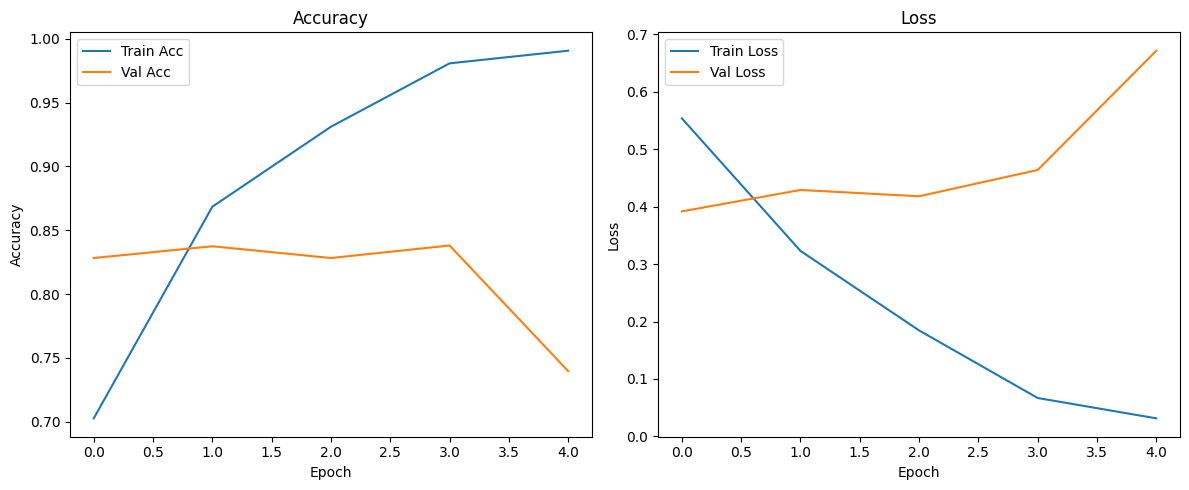

In [ ]:
plot_training_curves(history_rnn)

In [ ]:
# Evaluate RNN model on test set
loss, acc = model_rnn.evaluate(X_test, y_test)
model_accuracies['RNN'] = acc
print(f"Test Accuracy: {100*acc:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8248 - loss: 0.4007
Test Accuracy: 82.48%


## 🔹 2. Build an LSTM Model

In [ ]:
model_lstm = Sequential([
    Input(shape=(maxlen,)),
    Embedding(input_dim=vocab_size, output_dim=128),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# model_lstm.build(input_shape=(None, maxlen))

model_lstm.summary()

In [ ]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Training LSTM model
history_lstm = model_lstm.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[early_stop]
)

In [ ]:
# Plot LSTM training curves
plot_training_curves(history_lstm)

In [ ]:
# Evaluate LSTM model on test set
loss, acc = model_lstm.evaluate(X_test, y_test)
model_accuracies['LSTM'] = acc
print(f"Test Accuracy (LSTM): {100*acc:.2f}%")

## 🔹 3. Build a Deep LSTM Model

In [ ]:
model_deep_lstm = Sequential([
    Input(shape=(maxlen,)),
    Embedding(input_dim=vocab_size, output_dim=128),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_deep_lstm.summary()

In [ ]:
model_deep_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_deep_lstm = model_deep_lstm.fit(X_train,
                                        y_train,
                                        validation_split=0.2,
                                        epochs=10,
                                        batch_size=64,
                                        callbacks=[early_stop])

In [ ]:
plot_training_curves(history_deep_lstm)

In [ ]:
loss, acc = model_deep_lstm.evaluate(X_test, y_test)
model_accuracies['Deep LSTM'] = acc
print(f"Test Accuracy (Deep LSTM): {100*acc:.2f}")

### 🔹 4. GRU Model

In [ ]:
model_gru = Sequential([
    Input(shape=(maxlen,)),
    Embedding(input_dim=vocab_size, output_dim=128),
    GRU(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_gru.summary()

In [ ]:
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_gru = model_gru.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64, callbacks=[early_stop])

In [ ]:
plot_training_curves(history_gru)

In [ ]:
loss, acc = model_gru.evaluate(X_test, y_test)
model_accuracies['GRU'] = acc
print(f"Test Accuracy (GRU): {100*acc:.4f}%")

## 🔹 5. Bidirectional LSTM Model

In [ ]:
model_bilstm = Sequential([
    Input(shape=(maxlen,)),
    Embedding(input_dim=vocab_size, output_dim=128),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_bilstm.summary()

In [ ]:
model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_bilstm = model_bilstm.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64, callbacks=[early_stop])

In [ ]:
plot_training_curves(history_bilstm)

In [ ]:
loss, acc = model_bilstm.evaluate(X_test, y_test)
model_accuracies['Bidirectional LSTM'] = acc
print(f"Test Accuracy (Bidirectional LSTM): {100*acc:.2f}%")

## 🔹 6. Attention Based Model

In [ ]:
input_layer = Input(shape=(maxlen,))
x = Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen)(input_layer)
x = LSTM(64, return_sequences=True)(x)
x = Attention(use_scale=True)([x, x])
x = GlobalAveragePooling1D()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model_attention = Model(inputs=input_layer, outputs=output_layer)
model_attention.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_attention.summary()

In [ ]:
history_attention = model_attention.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64, callbacks=[early_stop])

In [ ]:
plot_training_curves(history_attention)

In [ ]:
loss, acc = model_attention.evaluate(X_test, y_test)
model_accuracies['LSTM + Attention'] = acc
print(f"Test Accuracy (LSTM + Attention): {100*acc:.2f}%")

## 🔹 7. Results Summary

In [ ]:
# Summary comparison table
print("\nModel Performance Summary:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name:<20} : {100*accuracy:.2f}%")